In [44]:
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
from PIL import Image
from rembg import remove

import os
import logging

In [2]:
logging.basicConfig(level=logging.INFO, format="%(asctime)s\n%(levelname)s:\n%(message)s")

# Preprocessing
### 순서
1. 크기 조정
2. 배경삭제
3. 윤곽선 탐지
4. 이미지 중앙 이동
5. 외부 모델 불러오기
6. 점 예측
7. 각도 추출
8. 무지외반 판별
9. 이미지 및 각도 반환
- 이거 뭔가 잘못 된거 같다 -> 크기조정하고 나서 배경삭제가 뭔가 이상하다
### 라이브러리
- 배경삭제: remBg
- 이미지 처리: OpenCV, numpy, Pillow

### 0. 이미지 가져오기

In [3]:
root_path = os.getcwd()
static_path = os.path.join(root_path, "static")
root_path, static_path

image_file_name = "78996949-c8f5-4538-82f5-52d5fade8854.jpg"
image_file = os.path.join(static_path, "Img", image_file_name)
image_file

'/Users/janghyolim/Desktop/code/HFoot/static/Img/78996949-c8f5-4538-82f5-52d5fade8854.jpg'

### 1. 이미지 크기 변환 (224x224)

In [6]:
image = Image.open(image_file)
if image.mode == "RGBA":
    image = image.convert("RGB")
image_resized = image.resize((224,224))
image_array = np.array(image_resized)/255.0

### 3. 배경삭제

In [ ]:
rm_image = remove()

# 외부에서 모델가져와서 사용하기
### keras파일 가져와서 사용하기
<p>- **euclidean_distance_loss( )**<br/><br/>모델의 예측값(pred)과 실제값(true) 사이의 유클리안 거리를 계산하는 손실함수<br/>물리적 거리 or 유사성 측정할 때 사용됨</p>
<p>- **여기서 내가 가지는 의문점**<br><br/> 이미 배경지운걸로 모델학습을 완료했는데, 이미지 데이터 넘어올 때도 배경삭제해서 모델 돌려야햐나?</p>

In [10]:
import tensorflow as tf

In [14]:
# 직접 정의한 메서드라고 합니다
def euclidean_distance_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_sum(tf.square(y_pred - y_true), axis=-1))

In [13]:
model_path = os.path.join(static_path, "keras_model", "cnn_model.keras")

model = tf.keras.models.load_model(model_path, custom_objects={"euclidean_distance_loss" : "euclidean_distance_loss"})
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,635,732 (299.97 MB)

 Trainable params: 26,211,910 (99.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52,423,822 (199.98 MB)

### 여기서부터 제대로 진행되는 듯 합니다
<p><strong>resize_with_padding( )</strong><br/><br/>- padding: 주어진 목표크기에 맞추기 위해 남는 공간을 특정 색상으로 채워놓는 것<br/>- 비율을 유지하면서 여백으로 채우기 위함<br/>- 일반적으로는 검은색으로 채워진다고 함</p>

In [24]:
def resize_with_padding(image_file, target_size: tuple = (224, 224)):
    image_height, image_width = image_file.shape[:2]
    target_height, target_width = target_size

    scale = min(target_width / image_width, target_height / image_height)  # 곱해질 비율
    new_image_width = int(image_width * scale)
    new_image_height = int(image_height * scale)

    resized_image = cv2.resize(image_file, (new_image_width, new_image_height))

    padding_width = (target_width - new_image_width) // 2
    padding_height = (target_height - new_image_height) // 2

    padded_image = cv2.copyMakeBorder(
        resized_image,
        padding_height,
        (target_height - new_image_height - padding_height),
        padding_width,
        (target_width - new_image_width - padding_width),
        borderType=cv2.BORDER_CONSTANT,
        value=[0,0,0]
    )
    
    return padded_image

In [48]:
image_path = os.path.join(static_path, "Img", "J0085.jpg")
image_file = cv2.imread(image_path)

padded_image = resize_with_padding(image_file)
input_image = padded_image / 255.0 #normalized
input_image = np.expand_dims(input_image , axis=0)

(4000, 3000)

### 모델을 통한 예측(Predict)

In [27]:
pred_coords = model.predict(input_image)
pred_coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[226.615   , 299.67944 , 193.77975 ,  38.842125, 246.25063 ,
        149.33466 ]], dtype=float32)

### 각도 계산
- 얻어온 좌표를 이용해서 RGB점들을 원본 이미지에 그립니다
- get_ratio_positon<br><br/>- 원본 이미지 크기에 맞춘 좌표로 이동하도록 도와줍니다 <br>- 이전에는 224,224로 맞춰진 이미지에 맞춰진 좌표입니다
- get_angle()<br><br/>- 사이각을 계산합니다<br/>- 역삼각함수 중 arccos 이용

In [40]:
def get_ratio_position(x, y, scaled_height, scaled_width):
    return (x * scaled_width , y*scaled_height)

In [42]:
def get_angle(p1, p2, p3):
    a = np.linalg.norm(np.array(p2) - np.array(p1))
    b = np.linalg.norm(np.array(p2) - np.array(p3))
    c = np.linalg.norm(np.array(p1) - np.array(p3))
    angle = np.arccos((a**2 + b**2 - c**2) / (2*a*b))
    return np.degrees(angle)

In [46]:
red_x, red_y, green_x, green_y, blue_x, blue_y = pred_coords[0]
(red_x, red_y), (green_x, green_y), (blue_x, blue_y)

((226.615, 299.67944), (193.77975, 38.842125), (246.25063, 149.33466))

In [41]:
height, width, _ = image_file.shape
scaled_height, scaled_width = height/224, width/224
red_x, red_y = get_ratio_position(red_x, red_y, scaled_height, scaled_width)
green_x, green_y = get_ratio_position(green_x, green_y, scaled_height, scaled_width)
blue_x, blue_y = get_ratio_position(blue_x, blue_y, scaled_height, scaled_width)
(red_x, red_y), (green_x, green_y), (blue_x, blue_y)

((3035.022394997733, 5351.418631417411),
 (2595.2645710536412, 693.6093739100866),
 (3297.999450138637, 2666.6902814592636))

In [43]:
rgb_angle = get_angle((red_x, red_y), (green_x, green_y), (blue_x, blue_y))
rgb_angle

14.21044686119386

### 이미지 그리기

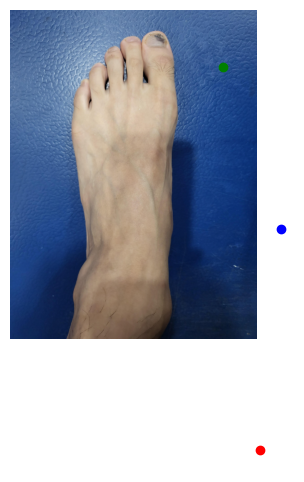

In [45]:
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB))

plt.scatter([red_x], [red_y], color='red')
plt.scatter([green_x], [green_y], color='green')
plt.scatter([blue_x], [blue_y], color='blue')

plt.axis('off')
plt.show()